# HOME CREDIT - VISUALIZATION

## 1. Import Library and read data

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()

import cufflinks as cf
cf.go_offline()

In [2]:
import os
print(os.listdir("../input"))

['application_test.csv', 'application_train', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
application_train = pd.read_csv('../input/application_train.csv')

In [4]:
print('Size of application_train data', application_train.shape)

Size of application_train data (307511, 122)


## 2. Check for missing data

In [5]:
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


## 3. Unique classes in each object column

In [6]:
temp = application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Unique classes in each object column', hole = 0.5)

## 4. Data Exploration

### 4.1 application_train

In [7]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# features of training data
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

### Distribution of AMT_CREDIT

C:\Users\bebon\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



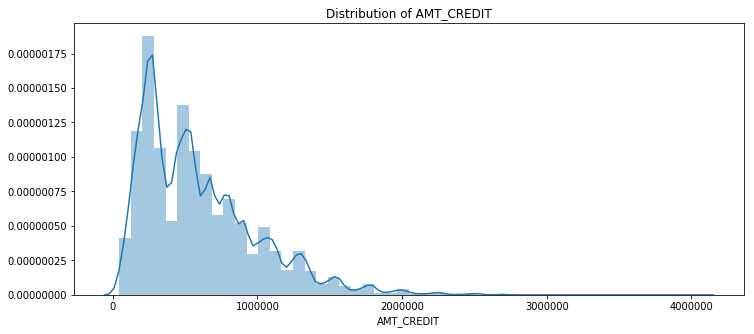

In [9]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(application_train["AMT_CREDIT"])

### Distribution of AMT_INCOME_TOTAL

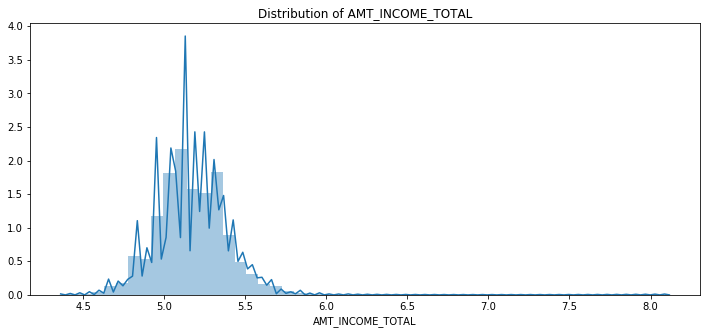

In [10]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
tr = application_train["AMT_INCOME_TOTAL"].dropna()
ax = sns.distplot(np.log10(tr))

### Data is balanced or imbalanced

In [17]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Loan Repayed or not')

### Income sources of Applicant's who applied for loan

In [18]:
temp = application_train["NAME_INCOME_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Income sources of Applicant\'s', hole = 0.5)

### Family Status

In [13]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Family Status of Applicant\'s', hole = 0.5)

### Education

In [14]:
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Education of Applicant\'s', hole = 0.5)

### 4.2 Application_test

In [40]:
application_test = pd.read_csv('../input/application_test.csv')

In [41]:
print ("Size of Test data: ", application_test.shape)

Size of Test data:  (48744, 121)


In [42]:
total = application_test.isnull().sum().sort_values(ascending = False)
percent = (application_test.isnull().sum()/application_test.isnull().count()*100).sort_values(ascending = False)
missing_application_test_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_test_data.head(20)

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302


### 4.3 Bureau

In [15]:
bureau = pd.read_csv('../input/bureau.csv')

In [16]:
print ("Size of Bureau: ", bureau.shape)

Sze of Bureau:  (1716428, 17)


In [19]:
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(20)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_TYPE,0,0.000000
AMT_CREDIT_SUM_OVERDUE,0,0.000000
CNT_CREDIT_PROLONG,0,0.000000


### Distribute AMT_CREDIT_SUM

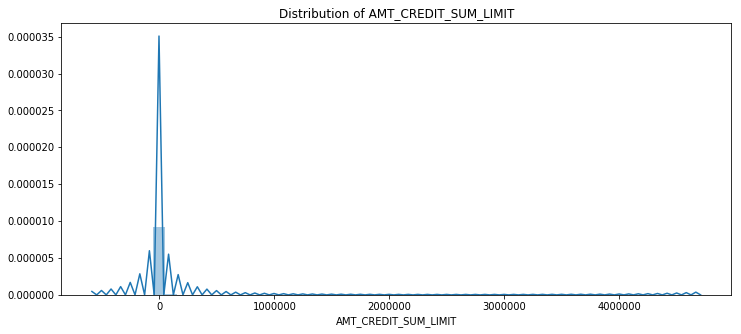

In [25]:
plt.figure(figsize=(12,5))
bureau["AMT_CREDIT_SUM_LIMIT"].fillna(0, inplace=True)
plt.title("Distribution of AMT_CREDIT_SUM_LIMIT")
ax = sns.distplot(bureau["AMT_CREDIT_SUM_LIMIT"])

### Distribute AMT_CREDIT_SUM_OVERDUE

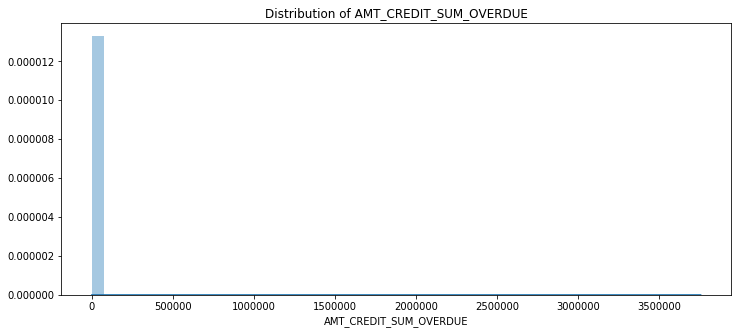

In [36]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT_SUM_OVERDUE")
ax = sns.distplot(bureau["AMT_CREDIT_SUM_OVERDUE"])

### CREDIT_TYPE

In [37]:
temp = bureau["CREDIT_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Credit type of Bureau\'s', hole = 0.5)

### 4.4 Bureau Balance

In [38]:
bureau_balance = pd.read_csv('../input/bureau_balance.csv')

In [ ]:
print ("Size of Bureau balance: ", bureau_balance.shape)

In [39]:
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_balance_data.head(20)

,Total,Percent
STATUS,0,0.0
MONTHS_BALANCE,0,0.0
SK_ID_BUREAU,0,0.0


### 4.5 Credit_card_balance

In [43]:
credit_card_balance = pd.read_csv('../input/credit_card_balance.csv')

In [44]:
print ("Size of credit_card_balance: ", credit_card_balance.shape)

Size of credit_card_balance:  (3840312, 23)


In [45]:
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_credit_card_balance_data.head(20)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_DPD_DEF,0,0.000000


### 4.6 installments_payments

In [49]:
installments_payments = pd.read_csv('../input/installments_payments.csv')

In [50]:
print ("Size of installments_payments: ", installments_payments.shape)

Size of installments_payments:  (13605401, 8)


In [51]:
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_installments_payments_data.head(20)

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_INSTALMENT,0,0.000000
DAYS_INSTALMENT,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


### 4.7 POS_CASH_balance

In [54]:
POS_CASH_balance = pd.read_csv('../input/POS_CASH_balance.csv')

In [55]:
print ("Size of POS_CASH_balance: ", POS_CASH_balance.shape)

Size of POS_CASH_balance:  (10001358, 8)


In [56]:
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_POS_CASH_balance_data.head(20)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
MONTHS_BALANCE,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000
